# 🏨 Airbnb Data Analytics 

## Importing Libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:
df = pd.read_csv('airdata.csv')
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


## Dropping Unwanted Columns

In [3]:
df = df.drop(columns = ['survey_id', 'country', 'city', 'borough', 'bathrooms', 'minstay', 'last_modified', 'location'])
df.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,10176931,49180562,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491
1,8935871,46718394,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,52.378518,4.896120
2,14011697,10346595,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,52.338811,4.943592
3,6137978,8685430,Shared room,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,52.376319,4.890028
4,18630616,70191803,Shared room,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,52.370384,4.852873


In [4]:
df.shape

(18723, 12)

## 🏘 Exploring Neighborhoods Column

In [5]:
neighborhoods = df.neighborhood.unique()
total_neighborhoods = len(neighborhoods)
total_neighborhoods

23

There are total of 23 neighborhoods in Amsterdam

### Neighborhood 🏘 V/s Prices 💵

<AxesSubplot:xlabel='price', ylabel='neighborhood'>

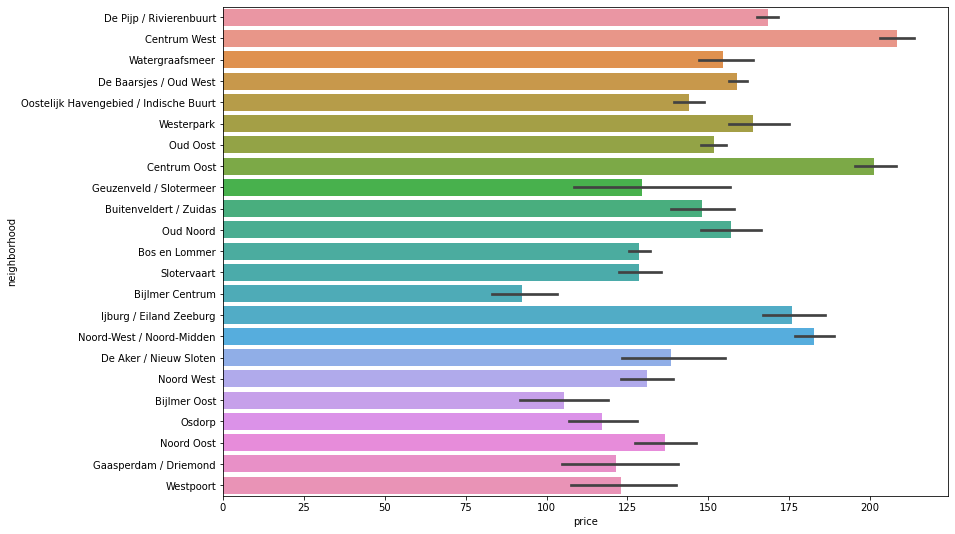

In [6]:
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(data = df, y = "neighborhood", x = "price", ax = ax, orient = "h")

### Neighborhood 🏘 V/s Reviews ⭐️

In [7]:
neighborhood_list = df['neighborhood'].unique()
group_by_neighborhood = df.groupby('neighborhood')
total_reviews_list = []
for i in neighborhood_list:
    neighborhood = group_by_neighborhood.get_group(i)
    total_reviews = neighborhood['reviews'].sum()
    total_reviews_list.append(total_reviews)
    print(i,":",total_reviews)

De Pijp / Rivierenbuurt : 35627
Centrum West : 52115
Watergraafsmeer : 6329
De Baarsjes / Oud West : 52823
Oostelijk Havengebied / Indische Buurt : 13284
Westerpark : 23433
Oud Oost : 15615
Centrum Oost : 37221
Geuzenveld / Slotermeer : 3080
Buitenveldert / Zuidas : 2818
Oud Noord : 8666
Bos en Lommer : 15481
Slotervaart : 5425
Bijlmer Centrum : 1563
Ijburg / Eiland Zeeburg : 4598
Noord-West / Noord-Midden : 19097
De Aker / Nieuw Sloten : 3128
Noord West : 4617
Bijlmer Oost : 1462
Osdorp : 2788
Noord Oost : 3624
Gaasperdam / Driemond : 450
Westpoort : 208


<AxesSubplot:xlabel='total_reviews', ylabel='neighborhood'>

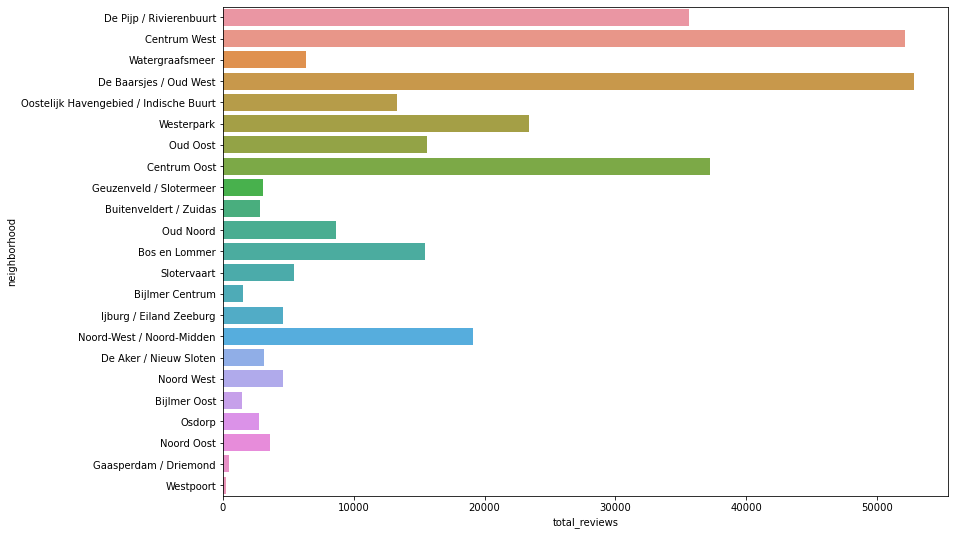

In [8]:
data = {"neighborhood" : neighborhood_list, "total_reviews" : total_reviews_list}
reviews_df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(data = reviews_df, y = "neighborhood", x = "total_reviews", ax = ax, orient = "h")

In [9]:
df['neighborhood'].value_counts()

De Baarsjes / Oud West                    3289
De Pijp / Rivierenbuurt                   2378
Centrum West                              2225
Centrum Oost                              1730
Westerpark                                1430
Noord-West / Noord-Midden                 1418
Oud Oost                                  1169
Bos en Lommer                              988
Oostelijk Havengebied / Indische Buurt     921
Watergraafsmeer                            517
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    378
Slotervaart                                349
Buitenveldert / Zuidas                     250
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97
Gaasperdam / 

In [10]:
center_districts = ["Centrum Oost", "Centrum West"]
west_neighborhood_districts = ["De Baarsjes / Oud West", "Westerpark", "Bos en Lommer"]
noord_neighborhood_districts = ["Noord-West / Noord-Midden", "Noord West", "Noord Oost", "Oud Noord"]
zuid_neighborhood_districts = ["Buitenveldert / Zuidas", "De Pijp / Rivierenbuurt"]
nieuw_neighborhood_districts = ["Slotervaart", "Geuzenveld / Slotermeer", "De Aker / Nieuw Sloten", "Osdorp"]
oost_neighborhood_districts = ["Oostelijk Havengebied / Indische Buurt", "Oud Oost", "Ijburg / Eiland Zeeburg ", "Watergraafsmeer"]
zuidoost_neighborhood_districts = ["Bijlmer Centrum", "Bijlmer Oost", "Gaasperdam / Driemond"]
westpoort = ["Westpoort"]

In [12]:
boroughs = [center_districts, west_neighborhood_districts, noord_neighborhood_districts, zuid_neighborhood_districts, nieuw_neighborhood_districts, oost_neighborhood_districts, zuidoost_neighborhood_districts, westpoort]

In [15]:
def generate_boroughs(record):
    if record['neighborhood'] in center_districts:
        val = "Centrum"
    elif record['neighborhood'] in west_neighborhood_districts:
        val = "West"
    elif record['neighborhood'] in noord_neighborhood_districts:
        val = "West"
    elif record['neighborhood'] in zuid_neighborhood_districts:
        val = "Zuid"
    elif record['neighborhood'] in nieuw_neighborhood_districts:
        val = "Nieuw-West"
    elif record['neighborhood'] in oost_neighborhood_districts:
        val = "Oost"
    elif record['neighborhood'] in zuidoost_neighborhood_districts:
        val = "Zuidoost"
    elif record['neighborhood'] in westpoort:
        val = "Westpoort"

    return val
    

In [16]:
df['boroughs'] = df.apply(generate_boroughs, axis = 1)

UnboundLocalError: local variable 'val' referenced before assignment